#how to web scrap the data

point 1:Inspect the website you want to scrap

point2: send an HTTP request

point3: use a tool or programming language to extract data
ex : tools we used beautifulsoup ,requests ,parser

point4:save the data in a structured format

In [ ]:
#https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024

#About Dataset



**1. Data Collection**
Make sure you have a well-structured dataset containing the features you specified. Your dataset should look something like this:


In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/songs_2000_2020_50k.csv')
data

,Title,Artist,Album,Genre,Release Date,Duration,Popularity
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34
...,...,...,...,...,...,...,...
49995,Thing.,Brandon Thomas,Lawyer sign.,Rock,2008-06-07,300,95
49996,Option.,Barry White,Cold.,Pop,2016-09-06,220,23
49997,Ability ever.,Leah Obrien,Trade.,Blues,2013-10-16,257,79
49998,Occur claim who.,Ashley James,Explain moment.,Jazz,2018-03-06,262,22


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         50000 non-null  object
 1   Artist        50000 non-null  object
 2   Album         50000 non-null  object
 3   Genre         50000 non-null  object
 4   Release Date  50000 non-null  object
 5   Duration      50000 non-null  int64 
 6   Popularity    50000 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 2.7+ MB


**2. Data Preprocessing**

**Handle Missing Values:** Check for and address any missing values in your dataset.

**Convert Data Types:** Ensure all columns are in the correct format (e.g., convert Release Date to a datetime format).

**Feature Engineering:** Create additional features if necessary, such as:
Extracting the year from the Release Date.
Converting Duration from a string format (e.g., "3:30") to a numerical format in seconds.

In [ ]:
data.isnull().sum()

,0
Title,0
Artist,0
Album,0
Genre,0
Release Date,0
Duration,0
Popularity,0


In [ ]:
data['Release Date'] = pd.to_datetime(data['Release Date'])

In [ ]:
data['Genre'].unique()

array(['R&B', 'Jazz', 'Electronic', 'Hip-Hop', 'Blues', 'Country',
       'Classical', 'Reggae', 'Rock', 'Pop'], dtype=object)

In [ ]:
data['Release Date'].min() ,data['Release Date'].max()

(Timestamp('2000-01-01 00:00:00'), Timestamp('2020-12-30 00:00:00'))

In [ ]:
data[data.duplicated()]

,Title,Artist,Album,Genre,Release Date,Duration,Popularity


1. The songs data is from january 01,2000 to december 30,2020
2. There is no missing  values in the dataset
3. There are 50000 rows and 7 features of data is their
4. There is no dulpicates in the dataset

In [ ]:
data['Duration'].min(),data['Duration'].max()

(120, 300)

In [ ]:
data = data[:20000]

**3. Exploratory Data Analysis (EDA)**

**Analyze Popularity:** Explore how different genres or artists relate to song popularity.

**Visualizations:** Use plots to visualize trends, such as the distribution of song popularity across genres or the release of songs over the years.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

array([[<Axes: title={'center': 'Release Date'}>,
        <Axes: title={'center': 'Duration'}>],
       [<Axes: title={'center': 'Popularity'}>, <Axes: >]], dtype=object)

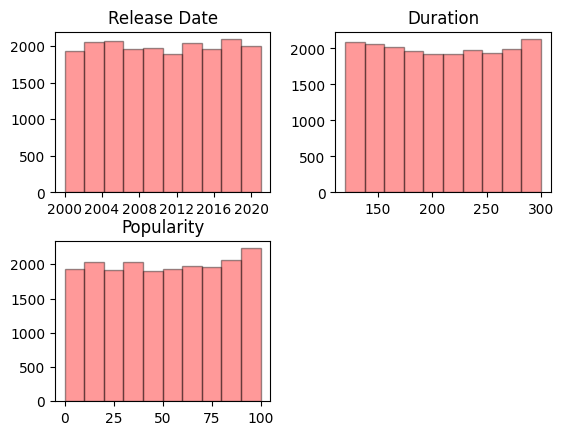

In [ ]:
data.hist(color = 'red' , edgecolor = 'black' , grid = False,alpha = 0.4)

<Axes: >

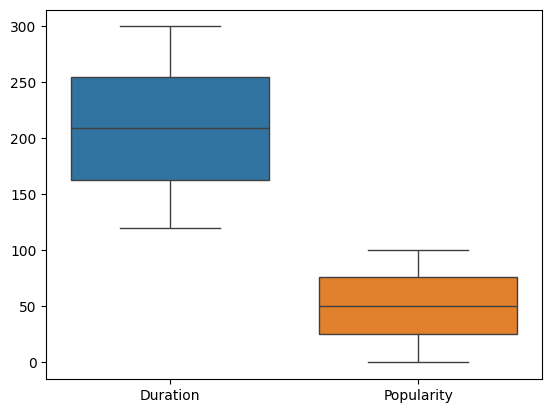

In [ ]:
sns.boxplot(data)

In [ ]:
data['Title'].nunique()

19036

In [ ]:
data['Artist'].nunique()

17899

In [ ]:
data['Genre'].unique()

array(['R&B', 'Jazz', 'Electronic', 'Hip-Hop', 'Blues', 'Country',
       'Classical', 'Reggae', 'Rock', 'Pop'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Country'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'Pop'),
  Text(3, 0, 'Blues'),
  Text(4, 0, 'Hip-Hop'),
  Text(5, 0, 'Electronic'),
  Text(6, 0, 'Reggae'),
  Text(7, 0, 'R&B'),
  Text(8, 0, 'Classical'),
  Text(9, 0, 'Rock')])

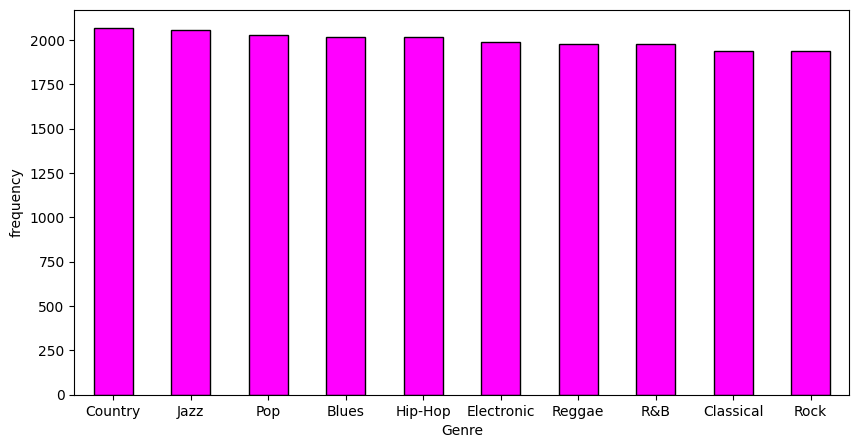

In [ ]:
plt.figure(figsize = (10,5))
plt.ylabel('frequency')
data['Genre'].value_counts().plot(kind = 'bar',color = 'magenta',edgecolor = 'black')
plt.xticks(rotation = 0)

In [ ]:
data['Popularity'].value_counts()

,count
Popularity,
34,227
89,226
97,225
77,223
60,222
...,...
47,176
69,176
25,172


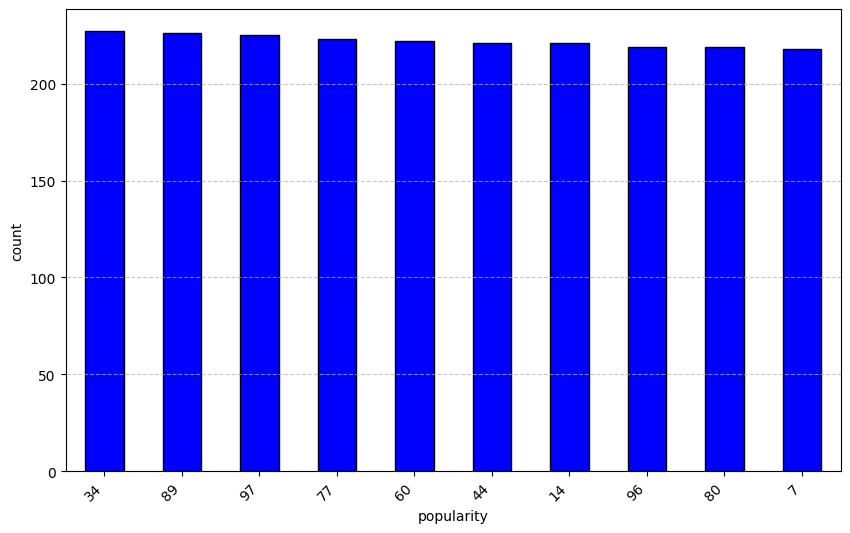

In [ ]:
top_popularity = data['Popularity'].value_counts().head(10)
plt.figure(figsize = (10,6))
top_popularity.plot(kind = 'bar' , color = 'blue' ,edgecolor = 'black')
#plt.figure(figsize = (15,5))
plt.xlabel('popularity')
plt.ylabel('count')
plt.xticks( rotation = 45 ,ha = 'right')
plt.grid(axis = 'y' ,linestyle = '--',alpha = 0.7)

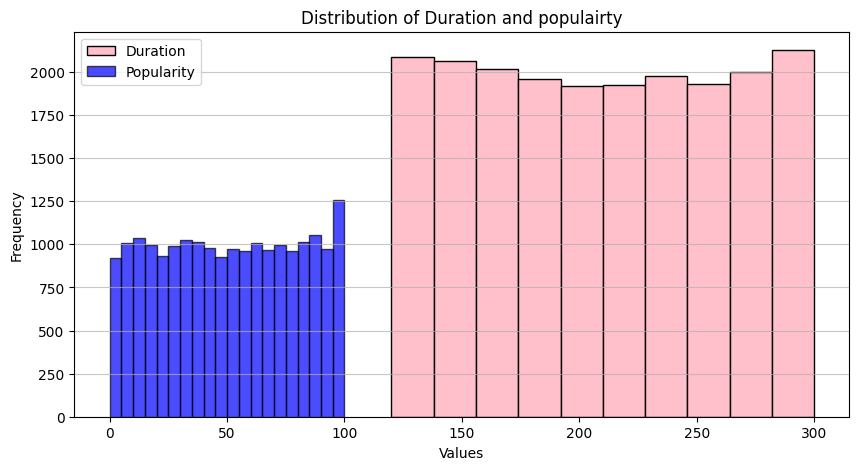

In [ ]:
from typing_extensions import dataclass_transform
plt.figure(figsize=(10, 5))

# Distribution of duration
plt.hist(data['Duration'],  color='pink', alpha= 1, label='Duration',edgecolor = 'black' )

# Distribution of popularity
plt.hist(data['Popularity'], bins=20, color='blue', alpha=0.7, label='Popularity' , edgecolor = 'black')

plt.title('Distribution of Duration and populairty')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.7)
plt.show()

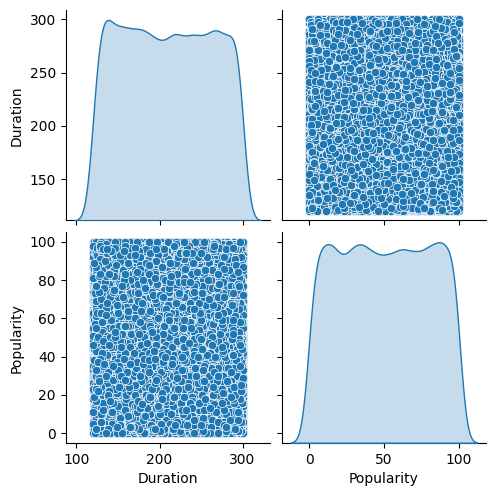

In [ ]:
import seaborn as sns
sns.pairplot(data,diag_kind = 'kde' )

<Axes: >

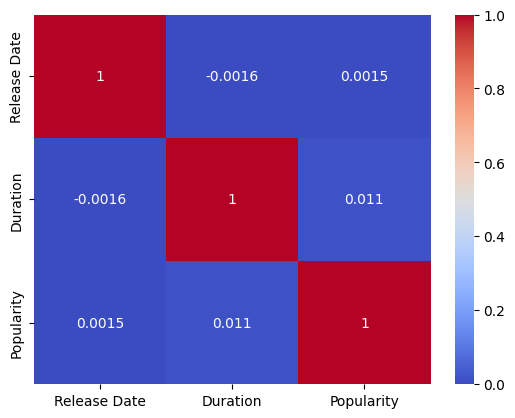

In [ ]:
corr_matrix = data.iloc[:,4:].corr()
sns.heatmap(corr_matrix , annot = True , cmap = 'coolwarm')

<Axes: xlabel='Popularity', ylabel='Duration'>

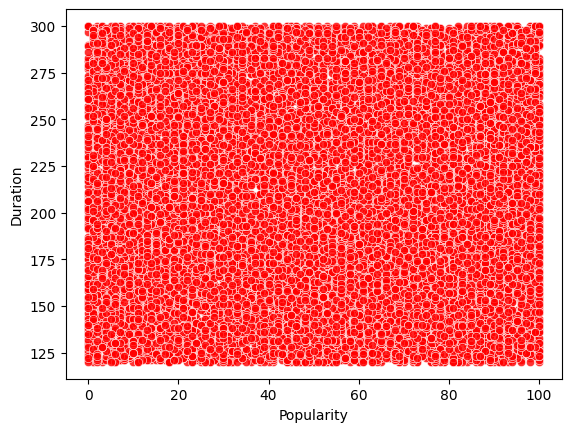

In [ ]:
sns.scatterplot(data = data , x = 'Popularity' , y = 'Duration' , alpha = 0.8 , c = 'red')

**4. Model Selection**
You have various options for building a recommendation system:

**A. Content-Based Filtering**
Use the features of the songs to recommend similar songs:

Vectorization: Convert the categorical variables (e.g., Genre, Artist) into numerical format using techniques like one-hot encoding or TF-IDF (for text-based features).
Cosine Similarity: Calculate the similarity between songs based on their features and recommend songs that are most similar to the ones the user likes.

**B. Collaborative Filtering**
If you have user interaction data (e.g., song ratings, play history), you can use:

Matrix Factorization: Techniques like Singular Value Decomposition (SVD) or Alternating Least Squares (ALS).
User-Item Interaction Matrix: Create a matrix where rows represent users and columns represent songs, filling it with interactions (e.g., plays, likes).

**C. Hybrid Model**
Combine both content-based and collaborative filtering approaches to leverage the strengths of each.

In [ ]:
df = data.copy()
df.head()

,Title,Artist,Album,Genre,Release Date,Duration,Popularity
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34


# Using NLP concept for Recommendation Systems

In [ ]:
df['Duration'] = df['Duration'].astype(str)
df['Popularity'] = df['Popularity'].astype(str)

In [ ]:
df['merge_all'] = df['Title'] + ' ' + df['Artist'] + ' ' + df['Album'] + ' ' + df['Genre'] + ' ' + df['Duration'] + ' ' + df['Popularity']

In [ ]:
df.head()

,Title,Artist,Album,Genre,Release Date,Duration,Popularity,merge_all
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71,Include name this. Patrick Anderson Care. R&B ...
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37,Manage west energy. Eric Miller Raise get. Jaz...
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58,Evening court painting. Richard Curry Sport. E...
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59,Section turn hour. James Smith Full. Hip-Hop 2...
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34,Five agreement teach. Amy Rodriguez Eat. Blues...


In [ ]:
new_df = df['merge_all']
new_df

,merge_all
0,Include name this. Patrick Anderson Care. R&B ...
1,Manage west energy. Eric Miller Raise get. Jaz...
2,Evening court painting. Richard Curry Sport. E...
3,Section turn hour. James Smith Full. Hip-Hop 2...
4,Five agreement teach. Amy Rodriguez Eat. Blues...
...,...
19995,Professional half live bit. Jennifer Lopez Eve...
19996,Control just. Danielle Willis Whatever office....
19997,Save health record. Natalie Rivera Everyone so...
19998,Job front. Lawrence Clark Part. Classical 271 62


In [ ]:
new_df = new_df.apply(lambda x:x.lower())

In [ ]:
new_df

,merge_all
0,include name this. patrick anderson care. r&b ...
1,manage west energy. eric miller raise get. jaz...
2,evening court painting. richard curry sport. e...
3,section turn hour. james smith full. hip-hop 2...
4,five agreement teach. amy rodriguez eat. blues...
...,...
19995,professional half live bit. jennifer lopez eve...
19996,control just. danielle willis whatever office....
19997,save health record. natalie rivera everyone so...
19998,job front. lawrence clark part. classical 271 62


In [ ]:
new_df = new_df[:20000]
new_df

,merge_all
0,include name this. patrick anderson care. r&b ...
1,manage west energy. eric miller raise get. jaz...
2,evening court painting. richard curry sport. e...
3,section turn hour. james smith full. hip-hop 2...
4,five agreement teach. amy rodriguez eat. blues...
...,...
19995,professional half live bit. jennifer lopez eve...
19996,control just. danielle willis whatever office....
19997,save health record. natalie rivera everyone so...
19998,job front. lawrence clark part. classical 271 62


In [ ]:
import nltk
import spacy
import re

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.stem.snowball import SnowballStemmer
# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")

In [ ]:
# Define a function to perform both stemming and tokenization
def tokenize_and_stem(text):
    # Tokenize by sentence, then by word
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    # Filter out raw tokens to remove noise
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    # Stem the filtered_tokens
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

In [ ]:
song_token = []
for i in new_df:
    tk = tokenize_and_stem(i)
    song_token.append(tk)
    print(tk)

Streaming output truncated to the last 5000 lines.
['finish', 'pm', 'julia', 'william', 'region', 'difficult', 'electron']
['charact', 'part', 'andr', 'flore', 'trip', 'within', 'pop']
['concern', 'kid', 'hotel', 'mean', 'terri', 'morton', 'fund', 'skill', 'rock']
['suggest', 'interview', 'direct', 'spend', 'riley', 'thompson', 'record', 'countri']
['you', 'skin', 'economi', 'side', 'lee', 'wall', 'other', 'parti', 'pop']
['across', 'prove', 'ball', 'jim', 'smith', 'protect', 'jazz']
['as', 'issu', 'parent', 'daniel', 'field', 'for', 'music', 'r', 'b']
['box', 'exampl', 'david', 'strickland', 'arm', 'million', 'pop']
['old', 'research', 'laugh', 'while', 'walter', 'berger', 'messag', 'jazz']
['carri', 'ten', 'state', 'jose', 'moss', 'sign', 'factor', 'countri']
['think', 'dinner', 'far', 'devin', 'hick', 'energi', 'countri']
['babi', 'next', 'agenc', 'natali', 'mcgee', 'happi', 'rule', 'blue']
['languag', 'recent', 'how', 'chad', 'flore', 'appear', 'regga']
['american', 'offer', 'rober

In [ ]:
new_df

,merge_all
0,include name this. patrick anderson care. r&b ...
1,manage west energy. eric miller raise get. jaz...
2,evening court painting. richard curry sport. e...
3,section turn hour. james smith full. hip-hop 2...
4,five agreement teach. amy rodriguez eat. blues...
...,...
19995,professional half live bit. jennifer lopez eve...
19996,control just. danielle willis whatever office....
19997,save health record. natalie rivera everyone so...
19998,job front. lawrence clark part. classical 271 62


In [ ]:
data.head()

,Title,Artist,Album,Genre,Release Date,Duration,Popularity
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df = 1.0, max_features = 5000 , min_df = 0.0, stop_words = 'english' ,use_idf= True,
                                   tokenizer = tokenize_and_stem ,ngram_range = (1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in new_df])
tfidf_matrix

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev'

<20000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 142588 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_matrix.shape

(20000, 5000)

In [ ]:
tfidf_matrix

<20000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 142588 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.03035004, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.03035004, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [ ]:
sorted(list(enumerate(cosine_sim[0])) , reverse = True , key = lambda x:x[1])

[(0, 1.0000000000000002),
 (4869, 0.4153338923794353),
 (10905, 0.3795275705498096),
 (2926, 0.3747922725680098),
 (16638, 0.36839905793444017),
 (4700, 0.36327078881252556),
 (12226, 0.36325769720873896),
 (17382, 0.35518527016905954),
 (13592, 0.34610174512316894),
 (16457, 0.3401748620120908),
 (3306, 0.33822866504152227),
 (17919, 0.3330313886545495),
 (9722, 0.33221747901061105),
 (7500, 0.32832174633805467),
 (9969, 0.3253057025511148),
 (15197, 0.32363451262848475),
 (2230, 0.3227419592333749),
 (5336, 0.3080776005026128),
 (15413, 0.2969315779970364),
 (17308, 0.29628468969260646),
 (212, 0.2958740446751157),
 (17630, 0.29429945407216507),
 (6046, 0.2857750917085672),
 (571, 0.2847499914160479),
 (16898, 0.2751200512756891),
 (9204, 0.27094019832107585),
 (11267, 0.2645733781330366),
 (10924, 0.26164819767058134),
 (13211, 0.2600722747350944),
 (7320, 0.25889902763048955),
 (10577, 0.25476727008104055),
 (7778, 0.24746953361389606),
 (7429, 0.24728697629050234),
 (7203, 0.24724

In [ ]:
cosine_sim[0]

array([1., 0., 0., ..., 0., 0., 0.])

**5. Model Training**
If using machine learning algorithms, split your data into training and testing sets.
Train your model on the training set and tune hyperparameters as needed.

In [ ]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[19842.25049446853, 19653.933863606755, 19573.12244298043, 19493.79225637326, 19413.3460582936, 19334.327159940072, 19255.355371984624, 19176.5211022354, 19097.096881569803, 19019.5486306851, 19000.341279677326, 18987.561952447333, 18975.93098023938, 18950.479170067356]


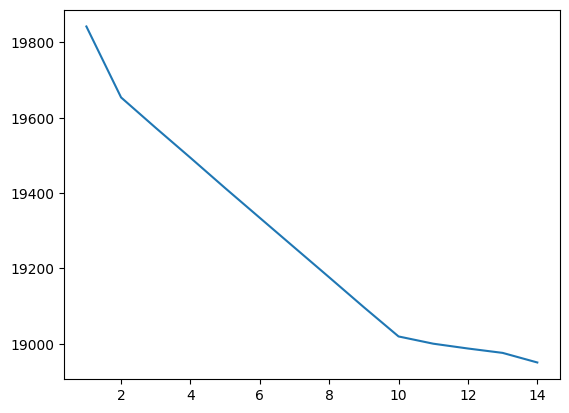

In [ ]:
#wcss (within cluster sum of squares)
wcss = []
for i in range(1,15):
  kmeans = KMeans(n_clusters = i , random_state = 0 )
  kmeans.fit(tfidf_matrix)
  wcss.append(kmeans.inertia_) #inertia = variance
print(wcss)
plt.plot(range(1,15),wcss)

In [ ]:
new_df = pd.DataFrame(new_df)

In [ ]:
new_df

,merge_all
0,include name this. patrick anderson care. r&b ...
1,manage west energy. eric miller raise get. jaz...
2,evening court painting. richard curry sport. e...
3,section turn hour. james smith full. hip-hop 2...
4,five agreement teach. amy rodriguez eat. blues...
...,...
19995,professional half live bit. jennifer lopez eve...
19996,control just. danielle willis whatever office....
19997,save health record. natalie rivera everyone so...
19998,job front. lawrence clark part. classical 271 62


In [ ]:
# Import k-means to perform clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 10,random_state=15)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
df["cluster"] = clusters
df['cluster'].value_counts()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,count
cluster,
7,2063
4,2052
0,2019
9,2019
6,2010
2,1984
1,1976
8,1975
3,1972


In [ ]:
clusters

[1,
 4,
 2,
 6,
 0,
 1,
 7,
 5,
 7,
 0,
 8,
 3,
 0,
 4,
 1,
 2,
 2,
 5,
 7,
 7,
 5,
 4,
 5,
 1,
 4,
 4,
 4,
 5,
 8,
 2,
 5,
 9,
 5,
 6,
 3,
 6,
 3,
 7,
 3,
 9,
 9,
 4,
 0,
 8,
 7,
 8,
 3,
 5,
 3,
 2,
 1,
 2,
 1,
 7,
 8,
 0,
 2,
 4,
 0,
 4,
 2,
 2,
 9,
 4,
 0,
 8,
 3,
 5,
 2,
 0,
 8,
 2,
 5,
 9,
 0,
 6,
 9,
 7,
 5,
 8,
 5,
 0,
 6,
 4,
 7,
 3,
 6,
 5,
 0,
 0,
 9,
 5,
 9,
 4,
 8,
 2,
 4,
 6,
 9,
 2,
 6,
 7,
 9,
 4,
 5,
 0,
 9,
 8,
 4,
 1,
 1,
 6,
 3,
 6,
 8,
 2,
 7,
 9,
 4,
 2,
 8,
 1,
 2,
 9,
 0,
 7,
 4,
 7,
 4,
 4,
 2,
 2,
 1,
 1,
 5,
 1,
 5,
 9,
 8,
 3,
 2,
 2,
 9,
 1,
 7,
 1,
 1,
 6,
 3,
 8,
 0,
 2,
 4,
 4,
 4,
 2,
 1,
 5,
 3,
 5,
 1,
 2,
 3,
 4,
 3,
 0,
 9,
 0,
 1,
 7,
 3,
 7,
 4,
 4,
 8,
 3,
 0,
 8,
 8,
 0,
 2,
 8,
 5,
 6,
 7,
 7,
 2,
 0,
 6,
 2,
 6,
 1,
 5,
 3,
 7,
 4,
 1,
 1,
 4,
 7,
 4,
 5,
 4,
 9,
 8,
 8,
 9,
 3,
 0,
 5,
 0,
 7,
 1,
 9,
 5,
 7,
 6,
 3,
 1,
 5,
 4,
 1,
 4,
 0,
 4,
 9,
 1,
 9,
 6,
 8,
 2,
 3,
 4,
 9,
 2,
 0,
 8,
 4,
 0,
 9,
 9,
 9,
 6,
 7,
 7,
 4,
 3,
 0,
 6,
 5,


In [ ]:
y_kmc = km.fit_predict(tfidf_matrix)
y_kmc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 4, 2, ..., 2, 5, 7], dtype=int32)

In [ ]:
type(y_kmc)

numpy.ndarray

In [ ]:
type(clusters)

list

In [ ]:
import numpy as np
clusters = np.array(clusters)

In [ ]:
type(clusters)

numpy.ndarray

In [ ]:
y_kmc

array([1, 4, 2, ..., 2, 5, 7], dtype=int32)

In [ ]:
clusters

array([1, 4, 2, ..., 2, 5, 7])

---------------------------------------------------------------

In [ ]:
df['y_kmc'] = y_kmc

In [ ]:
df.head()

,Title,Artist,Album,Genre,Release Date,Duration,Popularity,merge_all,cluster,y_kmc
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71,Include name this. Patrick Anderson Care. R&B ...,1,1
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37,Manage west energy. Eric Miller Raise get. Jaz...,4,4
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58,Evening court painting. Richard Curry Sport. E...,2,2
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59,Section turn hour. James Smith Full. Hip-Hop 2...,6,6
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34,Five agreement teach. Amy Rodriguez Eat. Blues...,0,0


In [ ]:
new_df.head()

,merge_all
0,include name this. patrick anderson care. r&b ...
1,manage west energy. eric miller raise get. jaz...
2,evening court painting. richard curry sport. e...
3,section turn hour. james smith full. hip-hop 2...
4,five agreement teach. amy rodriguez eat. blues...


In [ ]:
km

KMeans(n_clusters=10, random_state=15)

In [ ]:
df.head()

,Title,Artist,Album,Genre,Release Date,Duration,Popularity,merge_all,cluster,y_kmc
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71,Include name this. Patrick Anderson Care. R&B ...,1,1
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37,Manage west energy. Eric Miller Raise get. Jaz...,4,4
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58,Evening court painting. Richard Curry Sport. E...,2,2
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59,Section turn hour. James Smith Full. Hip-Hop 2...,6,6
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34,Five agreement teach. Amy Rodriguez Eat. Blues...,0,0


In [ ]:
df[df['cluster'] == 1]

,Title,Artist,Album,Genre,Release Date,Duration,Popularity,merge_all,cluster,y_kmc
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71,Include name this. Patrick Anderson Care. R&B ...,1,1
5,Turn child.,Jessica Martin,Cold according.,R&B,2006-09-16,207,58,Turn child. Jessica Martin Cold according. R&B...,1,1
14,Party yet.,Mr. Jeffery Harris,North.,R&B,2009-09-28,267,97,Party yet. Mr. Jeffery Harris North. R&B 267 97,1,1
23,Particularly rock.,Robert Lee,Concern rule.,R&B,2018-11-29,271,100,Particularly rock. Robert Lee Concern rule. R&...,1,1
50,Very determine.,Michael Baker,Fish.,R&B,2019-06-21,237,90,Very determine. Michael Baker Fish. R&B 237 90,1,1
...,...,...,...,...,...,...,...,...,...,...
19974,Send.,Justin Hicks,Decide.,R&B,2000-08-09,158,28,Send. Justin Hicks Decide. R&B 158 28,1,1
19978,Lawyer station painting.,Danny Cooley,Morning lawyer.,R&B,2001-06-24,263,46,Lawyer station painting. Danny Cooley Morning ...,1,1
19991,Situation affect.,Jesse Skinner,Almost.,R&B,2020-11-13,260,70,Situation affect. Jesse Skinner Almost. R&B 26...,1,1
19993,Because decide tax practice.,Phillip Fields,Yourself.,R&B,2006-12-31,165,3,Because decide tax practice. Phillip Fields Yo...,1,1


<Axes: xlabel='Popularity', ylabel='Genre'>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


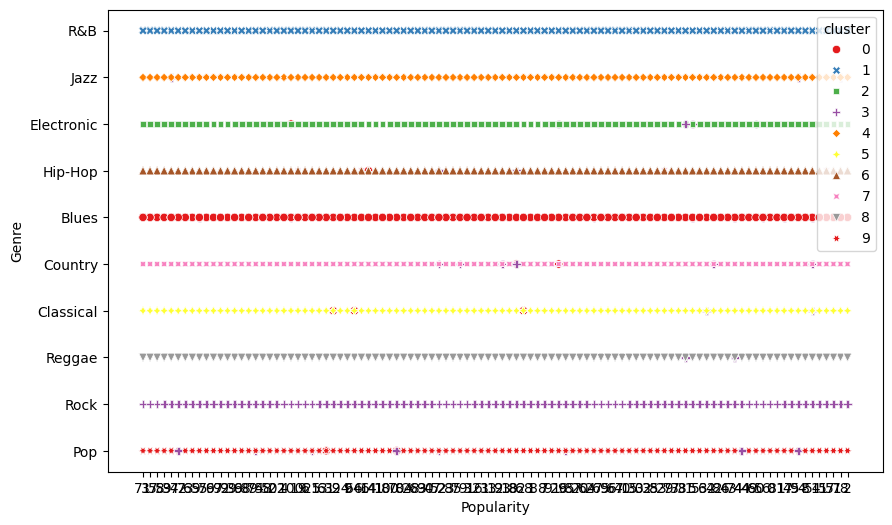

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x= 'Popularity' , y = 'Genre' ,hue = 'cluster' , style = 'cluster',palette = 'Set1')

**6. Model Evaluation**

Evaluate your model using metrics such as:

Precision@k: The fraction of recommended songs in the top-k that are relevant.

Recall@k: The fraction of relevant songs that are recommended in the top-k.

Mean Average Precision (MAP): Average of the precision scores at each relevant song.

Mean Squared Error (MSE): For regression tasks, if predicting popularity or ratings.

In [ ]:
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [ ]:
print(clusters.shape)  # Should be (n_samples, n_features)
print(y_kmc.shape)     # Should be (n_samples,)


(20000,)
(20000,)


In [ ]:
clusters = clusters.reshape(-1, 1)

In [ ]:
clusters.shape

(20000, 1)

In [ ]:
kmc_s_c = metrics.silhouette_score(clusters, y_kmc)
print(f'Silhouette Score: {kmc_s_c}')

Silhouette Score: 1.0


#recommandations

#recommendation using popularity

In [ ]:
# Sort by popularity in descending order and select the top 10 songs
top_10_songs = recommended_songs.sort_values(by='Popularity', ascending=False).head(10)

print(top_10_songs)



                           Title Genre Popularity
493         Public tonight miss.  Jazz         99
6125                Mother work.  Jazz         99
8031           Make chance hair.  Jazz         99
13                 Act majority.  Jazz         99
12735              Network full.  Jazz         99
10161                  Painting.  Jazz         99
2128   Mention important charge.  Jazz         99
5398     Represent manage their.  Jazz         99
18651                Note night.  Jazz         99
673                Car anything.  Jazz         99


In [ ]:
df['Popularity'].min(),df['Popularity'].max()

('0', '99')

In [ ]:
df.head()

,Title,Artist,Album,Genre,Release Date,Duration,Popularity,merge_all,cluster,y_kmc
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71,Include name this. Patrick Anderson Care. R&B ...,1,1
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37,Manage west energy. Eric Miller Raise get. Jaz...,4,4
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58,Evening court painting. Richard Curry Sport. E...,2,2
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59,Section turn hour. James Smith Full. Hip-Hop 2...,6,6
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34,Five agreement teach. Amy Rodriguez Eat. Blues...,0,0


In [ ]:
 #Get user input
import random
user_song = input("Enter the song title: ").strip()

# Check if the song is in the DataFrame's 'Title' column
if user_song in df['Title'].values:
    # Find the cluster of the user song
    cluster = df[df['Title'] == user_song]['cluster'].values[0]
    print('the song is there in ', cluster ,'cluster')

    # Get all songs in the same cluster

    # Filter by cluster and select multiple columns
    recommended_songs = df[df['cluster'] == cluster][['Title', 'Genre', 'Popularity']]

    #print(recommended_songs)
    #Sort by popularity in descending order and select the top 10 songs
    top_10_songs = recommended_songs.sort_values(by='Popularity', ascending=False).head(10)

    print(top_10_songs)



else:
    print("Invalid song")

Enter the song title: Manage west energy.
the song is there in  4 cluster
                                   Title Genre Popularity
1                    Manage west energy.  Jazz         37
13                         Act majority.  Jazz         99
21                         College grow.  Jazz         22
24                     Nor case subject.  Jazz         98
25     Office speak position television.  Jazz         19
...                                  ...   ...        ...
19961              Similar find protect.  Jazz         75
19971                Again then herself.  Jazz         43
19972                 Either human join.  Jazz         60
19980                   Treat away bill.  Jazz         42
19982           Paper high particularly.  Jazz         59

[2052 rows x 3 columns]


In [ ]:
recommended_songs['Genre'].nunique()

1

#                                               OR

#recommendation using random songs from the cluster

In [ ]:
import random

# Example of how to ensure the list type
recommended_songs = df[df['cluster'] == cluster]['Title'].tolist()

# Check if the list has at least 10 items
if len(recommended_songs) >= 10:
    # Randomly sample 10 unique songs
    random_songs = random.sample(recommended_songs, 10)
    print("Randomly sampled 10 unique songs:")
    print(random_songs)
else:
    print("The list has fewer than 10 songs.")


Randomly sampled 10 unique songs:
['Language example.', 'Necessary social.', 'Catch too month.', 'Middle meeting star able.', 'Road hope.', 'Play feeling.', 'Stop wonder never.', 'Practice former.', 'Use traditional.', 'Play very this.']



**7. Deployment**

Integrate the model into a web or mobile application where users can input their favorite songs and receive recommendations.

Set up a database to store user preferences and dynamically update recommendations based on user interactions.

In [ ]:
df

,Title,Artist,Album,Genre,Release Date,Duration,Popularity,merge_all,cluster,y_kmc
0,Include name this.,Patrick Anderson,Care.,R&B,2008-01-09,262,71,Include name this. Patrick Anderson Care. R&B ...,1,1
1,Manage west energy.,Eric Miller,Raise get.,Jazz,2011-08-20,187,37,Manage west energy. Eric Miller Raise get. Jaz...,4,4
2,Evening court painting.,Richard Curry,Sport.,Electronic,2010-05-30,212,58,Evening court painting. Richard Curry Sport. E...,2,2
3,Section turn hour.,James Smith,Full.,Hip-Hop,2014-10-12,272,59,Section turn hour. James Smith Full. Hip-Hop 2...,6,6
4,Five agreement teach.,Amy Rodriguez,Eat.,Blues,2005-06-09,131,34,Five agreement teach. Amy Rodriguez Eat. Blues...,0,0
...,...,...,...,...,...,...,...,...,...,...
19995,Professional half live bit.,Jennifer Lopez,Everybody white.,Reggae,2017-05-12,187,32,Professional half live bit. Jennifer Lopez Eve...,8,8
19996,Control just.,Danielle Willis,Whatever office.,R&B,2002-08-25,124,33,Control just. Danielle Willis Whatever office....,1,1
19997,Save health record.,Natalie Rivera,Everyone south.,Electronic,2019-01-25,271,0,Save health record. Natalie Rivera Everyone so...,2,2
19998,Job front.,Lawrence Clark,Part.,Classical,2001-09-16,271,62,Job front. Lawrence Clark Part. Classical 271 62,5,5


#Downloading clustering model and data frame using pickle

In [ ]:
#saving the model in disk for deployment
import pickle
filename = 'songs_model.pkl'
pickle.dump(km,open(filename,'wb'))

In [ ]:
filename = 'songs.pkl'
pickle.dump(df,open(filename,'wb'))